In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda, u_met
import glob
import metpy
from metpy import calc
from metpy.units import units
from scipy import stats
import metpy
from metpy import calc
from metpy.units import units
import pickle as pkl

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
dummy = xr.open_dataset(glob.glob('/media/ck/Elements/SouthAmerica/ERA5/hourly/peru/pressure_levels/*.nc')[0]).isel(time=0, level=0)

In [4]:
regions = {
'equatorial' : [(-5,0)],
'transition' : [(-8,-5)],
'central' : [(-12,-8)],
'southern' : [(-18,-15)]}
h = 2000

In [14]:
def get_spells(region, tag, spell_length, equal=None, gt=None, lt=None):
    
    spell_ds = xr.open_dataarray('/media/ck/Elements/SouthAmerica/CHIRPS/'+tag+'_spells_1mm_3-7days_'+region+'_StartOfSpell_areaCheck.nc')
 
    mask = 0
    if gt is not None:
        mask = spell_ds > spell_length
    if equal is not None:
        mask = spell_ds == spell_length
    if lt is not None:
        mask = (spell_ds > 3) & (spell_ds <= spell_length)
    #ipdb.set_trace()
    dry_dates= spell_ds.where(mask, drop=True)

    drydates = []
   
    for dryd in dry_dates.time:
            drydates.append(pd.Timestamp(dryd.values))
    out = pd.to_datetime(drydates)
    
    print('Len', len(out))
    
    return pd.to_datetime(drydates)

In [15]:
for pr in ['RioSanta','equatorial', 'transition', 'central','southern']:  
    
    drydates = get_spells(pr, 'dry',3, equal=True)
    wetdates = get_spells(pr, 'wet',3, equal=True)
    drydates5 = get_spells(pr, 'dry',5,lt=True)
    wetdates5 = get_spells(pr, 'wet',5,lt=True)
    drydates7 = get_spells(pr, 'dry',5,gt=True)
    wetdates7 = get_spells(pr, 'wet',5,gt=True)
    
    dic = {
    'dry3' : drydates,
    'wet3' : wetdates,
    'dry5' : drydates5,
    'wet5' : wetdates5,
    'dry7' : drydates7,
    'wet7' : wetdates7,
       }
    pkl.dump(dic, open("/home/ck/DIR/cornkle/data/HUARAZ/saves/"+pr+"_dw_spellDates_v2_1mm_fromRegional_areaCheck.p", "wb"))

Len 212
Len 258
Len 115
Len 120
Len 77
Len 56
Len 278
Len 232
Len 158
Len 65
Len 108
Len 28
Len 265
Len 200
Len 152
Len 69
Len 102
Len 29
Len 190
Len 242
Len 81
Len 109
Len 50
Len 62
Len 137
Len 123
Len 42
Len 60
Len 46
Len 31


In [16]:
allreg_dry = []
allreg_wet = []

for pr in ['equatorial', 'transition', 'central','southern']:
    dic = pkl.load(open("/home/ck/DIR/cornkle/data/HUARAZ/saves/"+pr+"_dw_spellDates_v2_1mm_fromRegional_areaCheck.p", "rb"))
    dry = dic['dry3'].month
    wet = dic['wet3'].month
    
    allreg_dry.append(dry.values)
    allreg_wet.append(wet.values)

In [17]:
import seaborn as sns
colord = sns.color_palette("magma_r")

Text(0, 0.5, 'PDF')

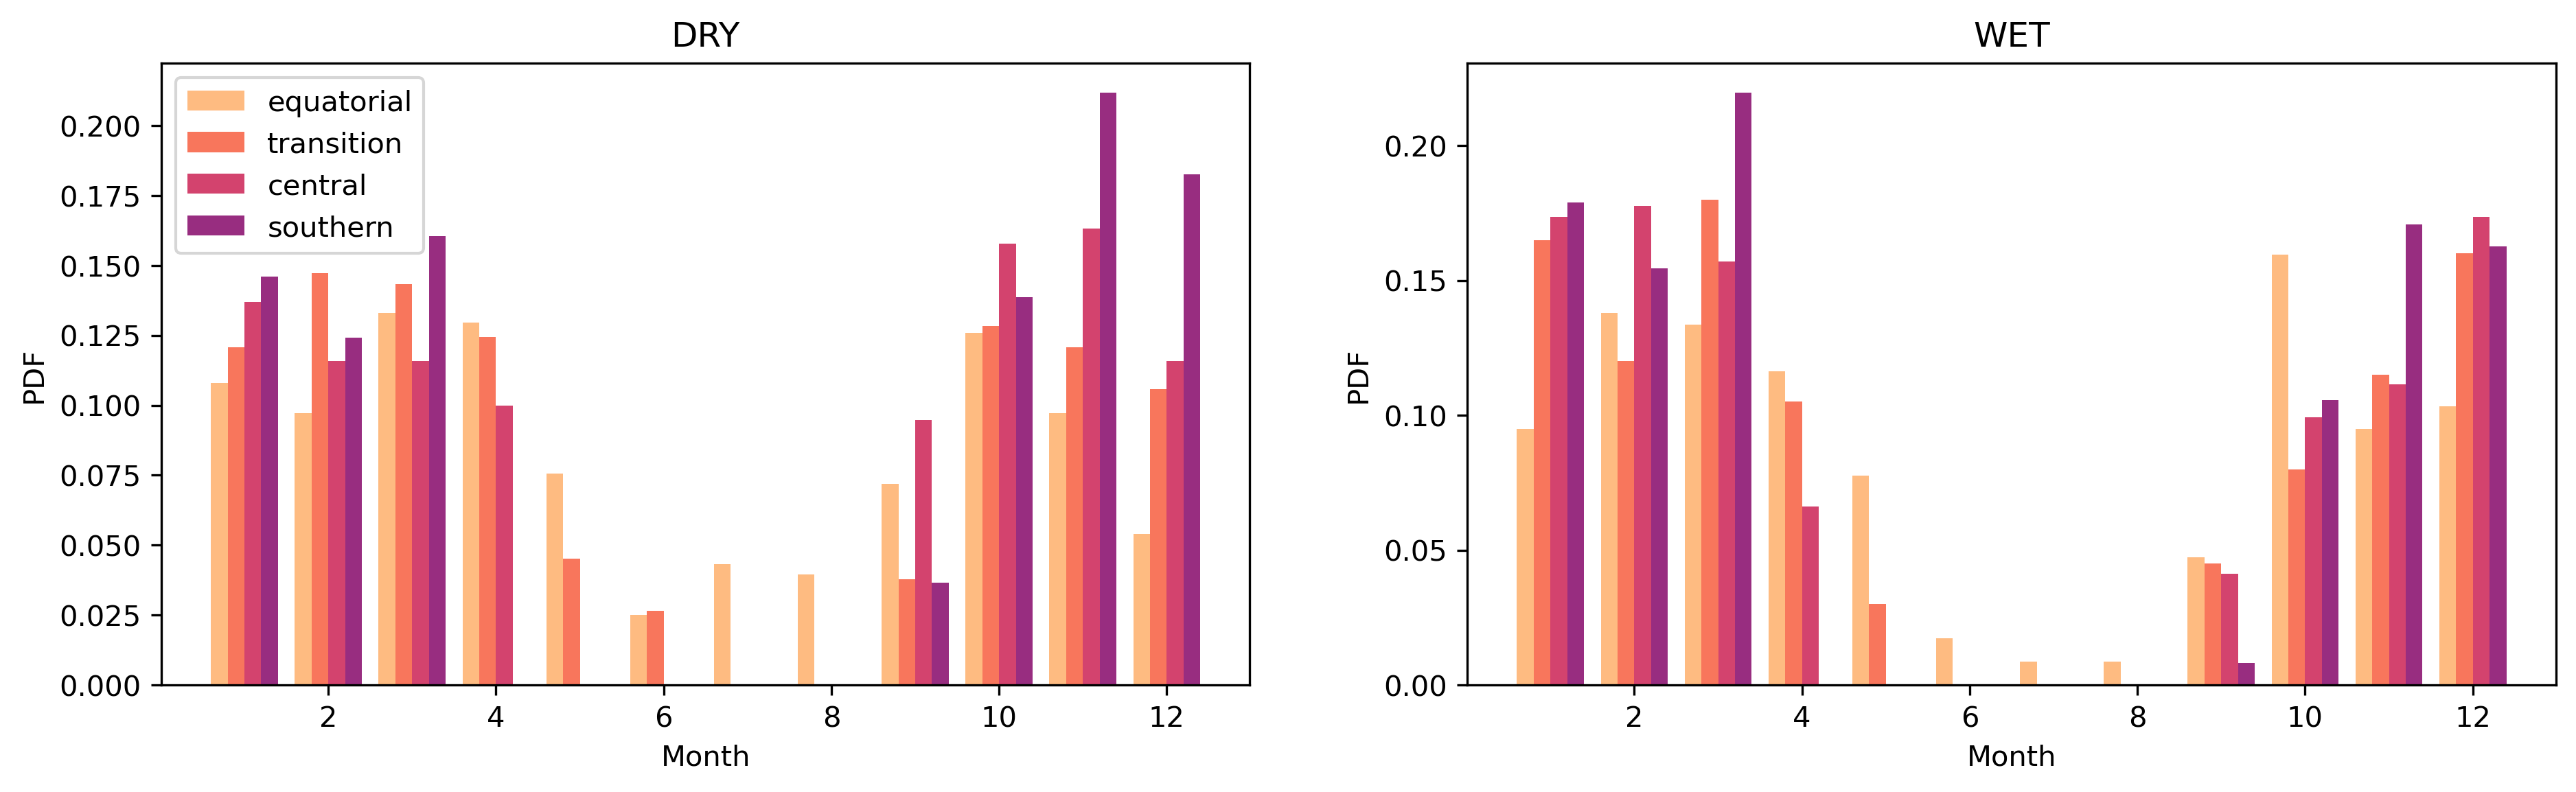

In [18]:
f = plt.figure(figsize=(15,4), dpi=300)
ax = f.add_subplot(121)
ax1 = f.add_subplot(122)
colors = [colord[0], colord[1], colord[2], colord[3]]
label = ['equatorial', 'transition', 'central','southern']

ax.hist(allreg_dry, np.arange(1,14)-0.5, histtype='bar', color=colors, label=label, density=True)
ax.legend()
ax.set_title('DRY')

ax1.hist(allreg_wet, np.arange(1,14)-0.5, histtype='bar', color=colors, density=True)
ax1.set_title('WET')

ax.set_xlabel('Month')
ax1.set_xlabel('Month')

ax.set_ylabel('PDF')
ax1.set_ylabel('PDF')

#f.savefig('/home/ck/DIR/cornkle/figs/HUARAZ/paper/supp_drywet_distributionMonth.jpg')

In [25]:
allreg_dry = []
allreg_wet = []

for pr in ['equatorial', 'transition', 'central','southern']:
    dic = pkl.load(open("/home/ck/DIR/cornkle/data/HUARAZ/saves/"+pr+"_dw_spellDates_v2_1mm_fromRegional_areaCheck.p", "rb"))
    dry = dic['dry3'].year
    wet = dic['wet3'].year
    
    allreg_dry.append(dry.values)
    allreg_wet.append(wet.values)

In [26]:
np.unique(allreg_dry[0])

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018])

Text(0, 0.5, 'PDF')

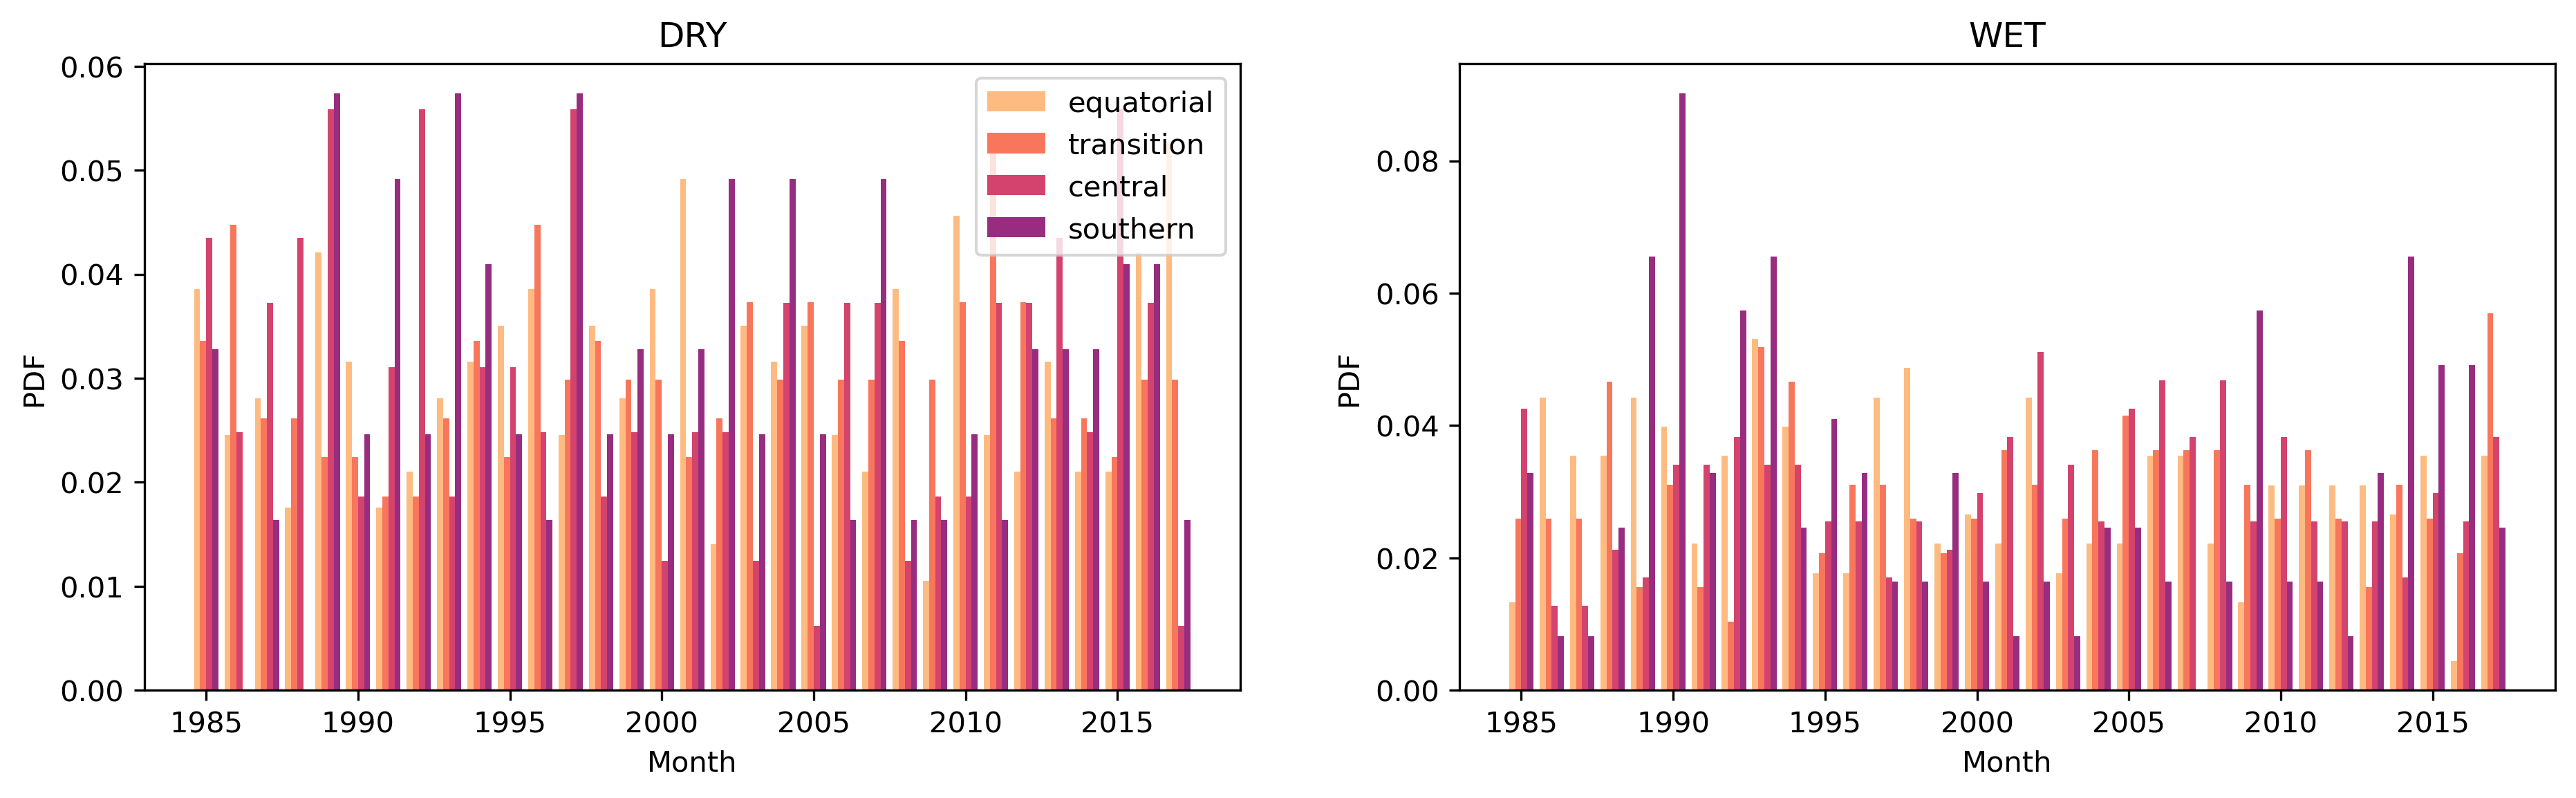

In [27]:
f = plt.figure(figsize=(15,4), dpi=300)
ax = f.add_subplot(121)
ax1 = f.add_subplot(122)
colors = [colord[0], colord[1], colord[2], colord[3]]
label = ['equatorial', 'transition', 'central','southern']

ax.hist(allreg_dry, np.unique(allreg_dry[0])-0.5, histtype='bar', color=colors, label=label, density=True)
ax.legend()
ax.set_title('DRY')

ax1.hist(allreg_wet, np.unique(allreg_dry[0])-0.5, histtype='bar', color=colors, density=True)
ax1.set_title('WET')

ax.set_xlabel('Month')
ax1.set_xlabel('Month')

ax.set_ylabel('PDF')
ax1.set_ylabel('PDF')

In [28]:
np.unique(allreg_dry[0], return_counts=True)

(array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
        1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
        2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
        2018]),
 array([11,  7,  8,  5, 12,  9,  5,  6,  8,  9, 10, 11,  7, 10,  8, 11, 14,
         4, 10,  9, 10,  7,  6, 11,  3, 13,  7,  6,  9,  6,  6, 12, 15, 12]))

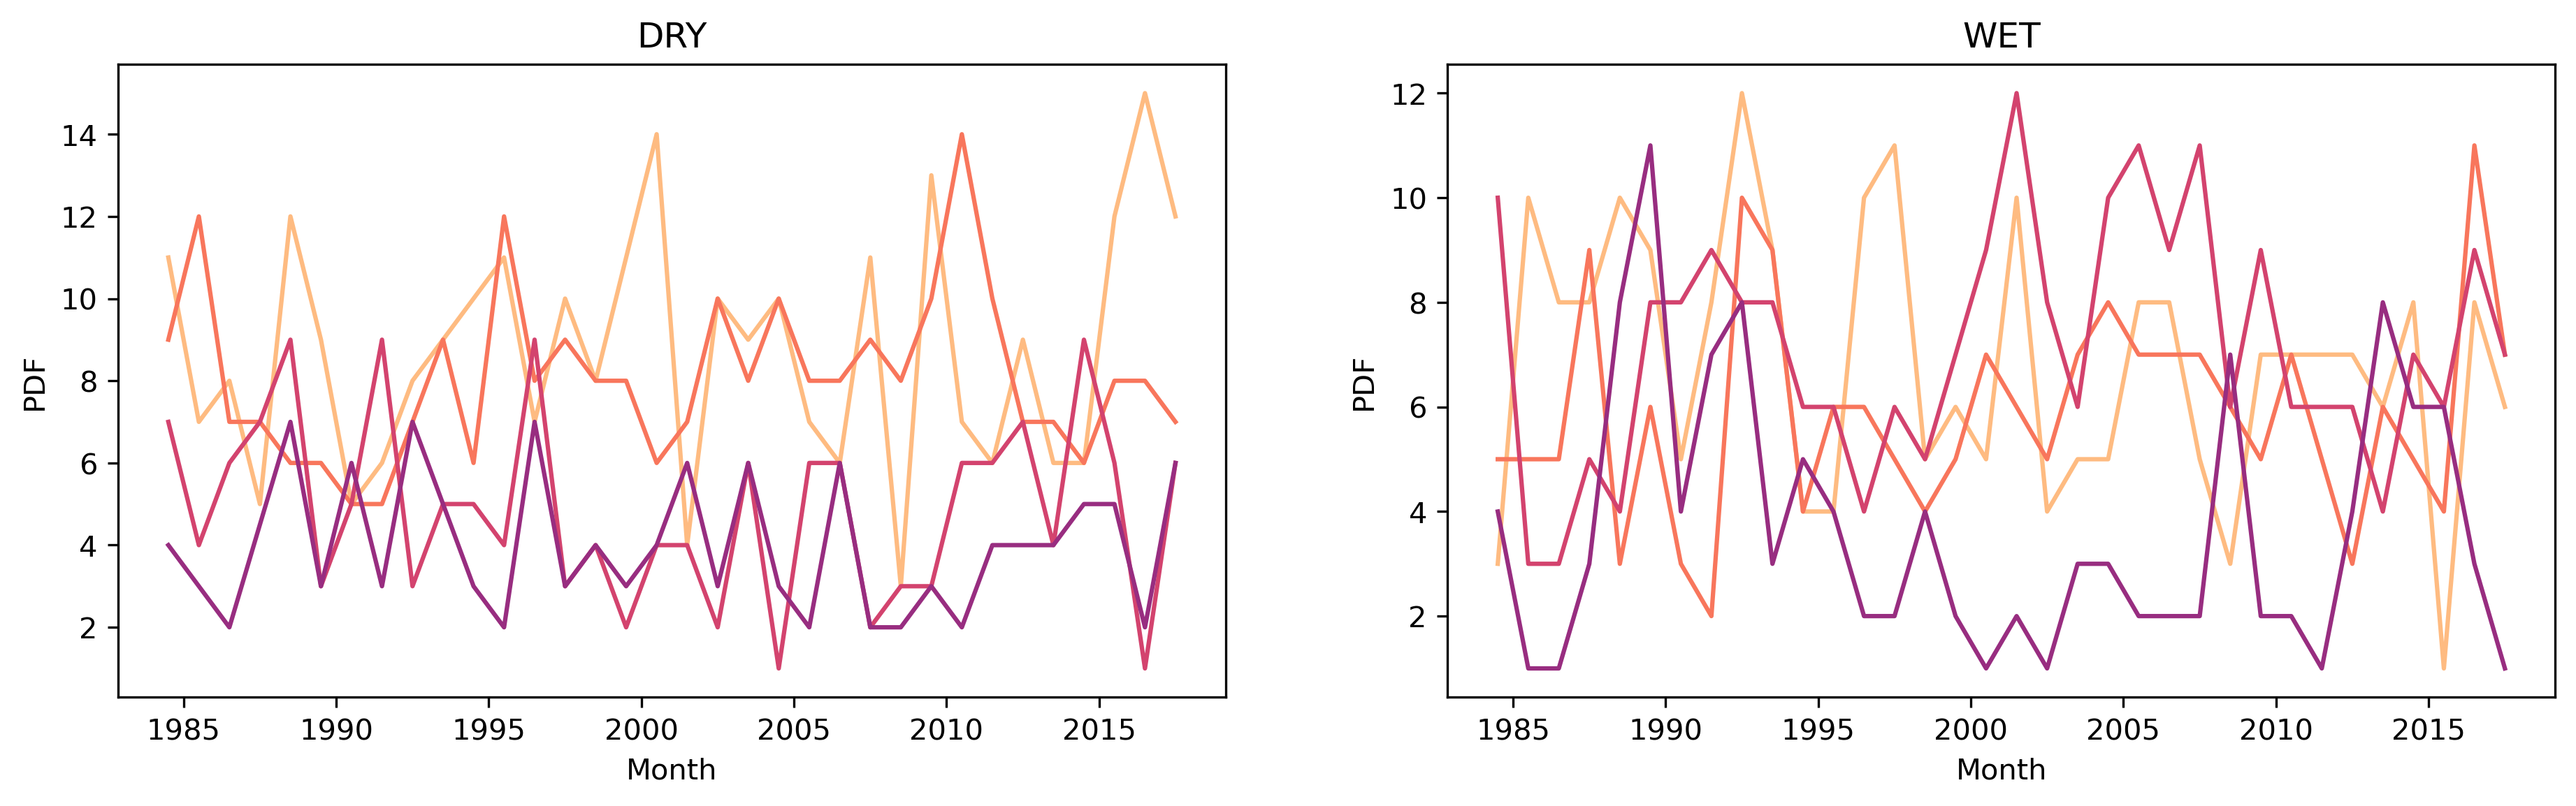

In [29]:
f = plt.figure(figsize=(15,4), dpi=300)
ax = f.add_subplot(121)
ax1 = f.add_subplot(122)
colors = sns.color_palette("magma_r") #[colord[0], colord[1], colord[2], colord[3]]
label = ['equatorial', 'transition', 'central','southern']

for ids, reg in enumerate(label):
    
    dy, dc = np.unique(allreg_dry[ids], return_counts=True)
    ax.plot(dy-0.5, dc,  color=colors[ids], label=label)
   # ax.legend()
    ax.set_title('DRY')
    
    wy, wc = np.unique(allreg_wet[ids], return_counts=True)
    ax1.plot(wy-0.5, wc,  color=colors[ids])
    ax1.set_title('WET')

    ax.set_xlabel('Month')
    ax1.set_xlabel('Month')

    ax.set_ylabel('PDF')
    ax1.set_ylabel('PDF')